In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\ML\Train.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Fill missing values in the "education" column with the mode
data['education'].fillna(data['education'].mode()[0], inplace=True)

In [4]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())
# Drop duplicates
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


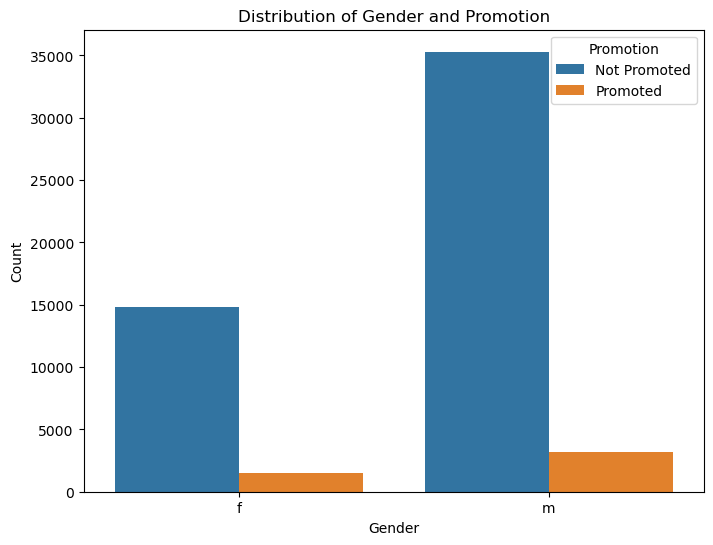

In [5]:
#Use Charts (Count plots) to examine and compare the features present in the dataset
# Create a count plot for gender and promotion status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='is_promoted')
plt.title('Distribution of Gender and Promotion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Promotion', labels=['Not Promoted', 'Promoted'])
plt.show()

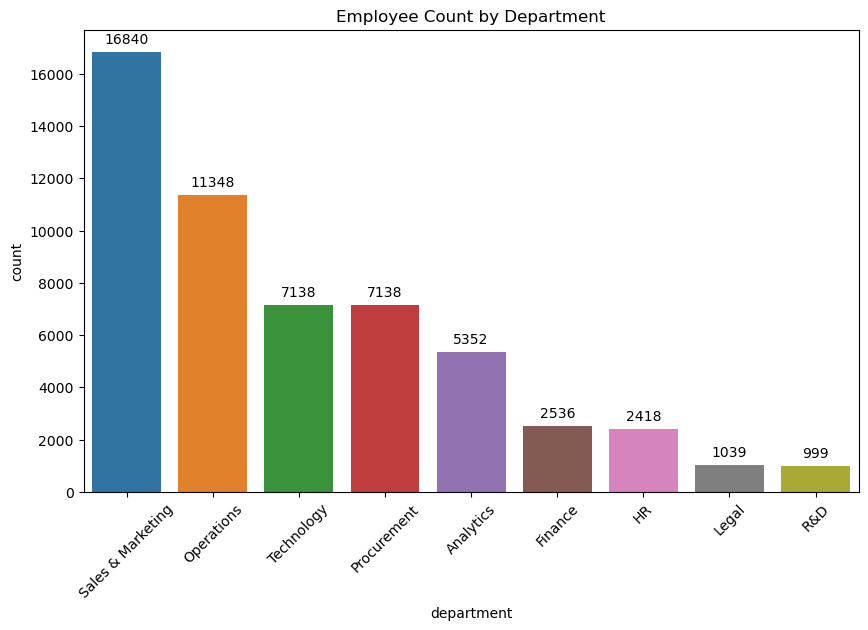

In [6]:
# Assuming 'data' is your DataFrame containing employee information
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='department', order=data['department'].value_counts().index) 
# The 'order' parameter specifies the order of departments based on their counts
plt.xticks(rotation=45)
plt.title('Employee Count by Department')

# Adding count annotations on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

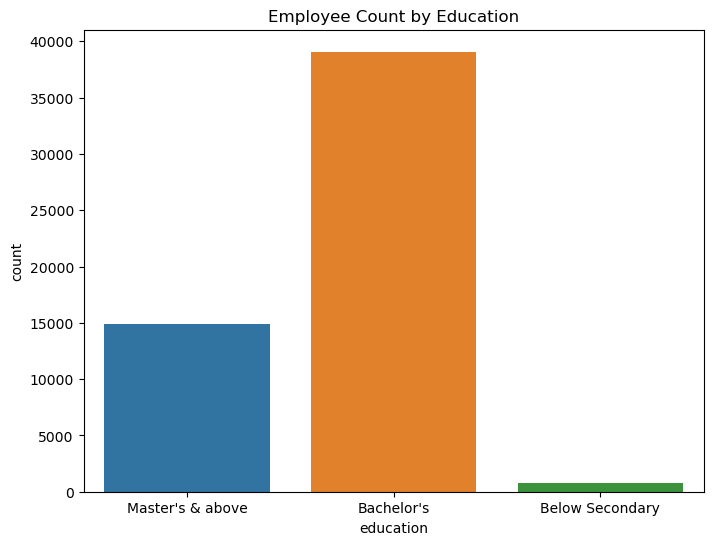

In [7]:
# Count plot for education
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='education')
plt.title('Employee Count by Education')
plt.show()

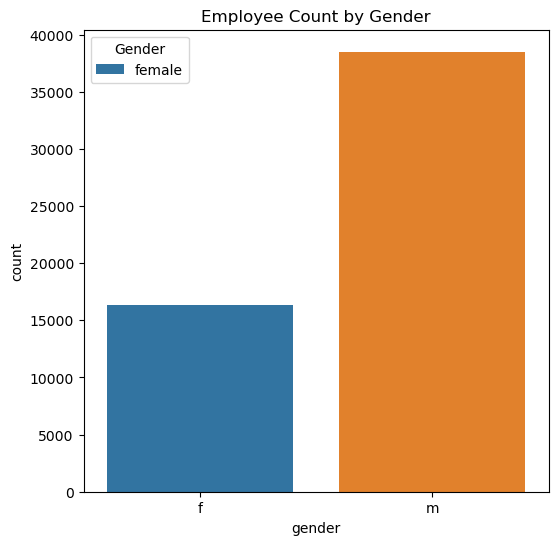

In [8]:
# Count plot for gender
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='gender')
plt.title('Employee Count by Gender')
plt.legend(title='Gender', labels=['female', 'male'])
plt.show()

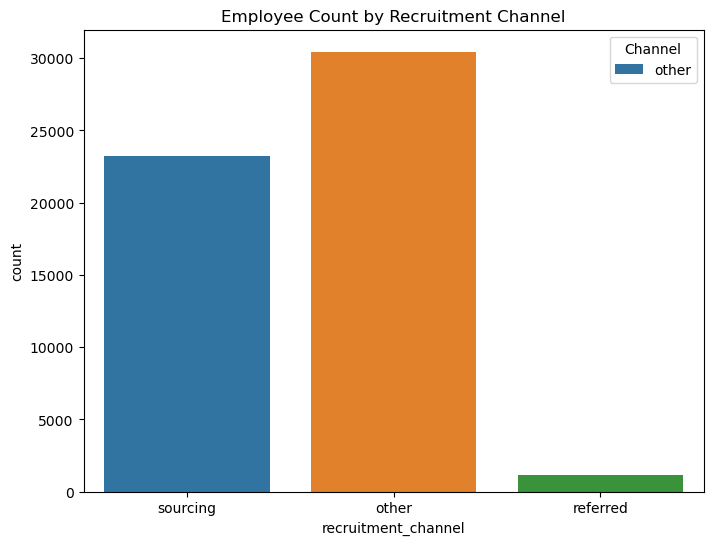

In [9]:
# Count plot for recruitment_channel
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='recruitment_channel')
plt.title('Employee Count by Recruitment Channel')
plt.legend(title='Channel', labels=['other','sourcing'])
plt.show()

In [10]:
# Drop unnecessary columns
data = data.drop(['employee_id', 'region'], axis=1)


In [11]:
#Checking null values
data.isnull().sum()

department                 0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
#Replaced the null values
data.dropna(axis=0,inplace=True)
data.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [47]:
scaler_type="minmax"

In [14]:

def scale_dataset(data, scaler_type):
    """
    Scale the dataset using the specified scaler.

    Args:
        data (DataFrame): The dataset to be scaled.
        scaler_type (str): Type of scaler to be used ('minmax', 'standard', 'robust', 'maxabs').

    Returns:
        DataFrame: The scaled dataset.
    """

In [15]:
data = data.copy()  # Create a copy to avoid modifying the original data

In [16]:
label_encoders = {}
categorical_columns = ['department', 'education', 'gender', 'recruitment_channel']
for column in categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [17]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,0,1,0,1,30,5.0,4,0,0,60,0
2,7,0,1,2,1,34,3.0,7,0,0,50,0
3,7,0,1,0,2,39,1.0,10,0,0,50,0
4,8,0,1,0,1,45,3.0,2,0,0,73,0


In [18]:
X = data.drop('is_promoted', axis=1)
y = data['is_promoted']

In [20]:
if scaler_type =='minmax':
    scaler=MinMaxScaler()
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'robust':
 scaler = RobustScaler()
elif scaler_type == 'maxabs':
    scaler = MaxAbsScaler()
else:
    raise ValueError("Invalid scaler_type. Choose from 'minmax', 'standard', 'robust', 'maxabs'.")      

In [52]:
# Scale the features
X_scaled = scaler.fit_transform(X)
X_scale=pd.DataFrame(X_scaled)
X_scale
    

,0,1,2,3,4,5,6,7,8,9,10
0,0.875,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...
50679,1.000,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
50680,0.500,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
50681,0.000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
50682,0.875,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [59]:
# Return the scaled dataset
def create_scaled_dataset(X_scaled, X_columns, y):
    scaled_dataset = pd.DataFrame(X_scaled, columns=X_columns)
    scaled_dataset['is_promoted'] = y
    return scaled_dataset


In [23]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#pip install xgboost

In [25]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [27]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

In [60]:
# XGBoost
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


XGBoost Accuracy: 0.94


In [29]:
# CatBoost
cat_classifier = CatBoostClassifier(random_state=42, verbose=0)
cat_classifier.fit(X_train, y_train)
y_pred_cat = cat_classifier.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat:.2f}")

CatBoost Accuracy: 0.94


In [30]:
# LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3429, number of negative: 37118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 40547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084569 -> initscore=-2.381833
[LightGBM] [Info] Start training from score -2.381833
LightGBM Accuracy: 0.94


In [31]:
# Define a list of ML models
models = [
    ("XGBoost", XGBClassifier(random_state=42)),
    ("CatBoost", CatBoostClassifier(random_state=42, verbose=0)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42))
]

In [32]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()


In [61]:
# Create a dictionary of scaling functions
scaling_functions = {
    'standard': standard_scaler,
    'minmax': min_max_scaler
}
scaling_functions

{'standard': StandardScaler(), 'minmax': MinMaxScaler()}

In [34]:
# Define scaling functions
scaling_functions = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler())
]

In [35]:
 # Iterate over scaling functions and models
for scaler_name, scaler in scaling_functions:
    # Scale the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models:
        print(f"Scaling: {scaler_name}, Model: {model_name}")
        

Scaling: StandardScaler, Model: XGBoost
Scaling: StandardScaler, Model: CatBoost
Scaling: StandardScaler, Model: LightGBM
Scaling: MinMaxScaler, Model: XGBoost
Scaling: MinMaxScaler, Model: CatBoost
Scaling: MinMaxScaler, Model: LightGBM


In [36]:
# Train the model
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 3429, number of negative: 37118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 40547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084569 -> initscore=-2.381833
[LightGBM] [Info] Start training from score -2.381833


LGBMClassifier(random_state=42)

In [64]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)
y_pred=pd.DataFrame(y_pred_scaled)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
10132,0
10133,0
10134,0
10135,0


In [38]:
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9212   25]
 [ 587  313]]


### There are 9212 instances that were correctly classified as the negative class (0).
### There are 313 instances that were correctly classified as the positive class (1).
### There are 587 instances that were actually positive but were classified as negative (false negatives).
### There are 25 instances that were actually negative but were classified as positive (false positives).
### The confusion matrix provides a detailed breakdown of the model's performance, allowing you to assess where the model is making correct predictions and where it's making errors. From this matrix, you can calculate various metrics like accuracy, precision, recall, and F1-score, which offer more comprehensive insights into the model's performance.







In [39]:
accuracy = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy:.2f}")
        
print("=" * 30)

Accuracy: 0.94


In [65]:
 #Train the models
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3429, number of negative: 37118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 40547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084569 -> initscore=-2.381833
[LightGBM] [Info] Start training from score -2.381833


LGBMClassifier(random_state=42)

In [42]:
# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.metrics import roc_curve, auc

In [45]:
# Calculate ROC curve and AUC
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs)
cat_auc = auc(cat_fpr, cat_tpr)

lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
lgb_auc = auc(lgb_fpr, lgb_tpr)

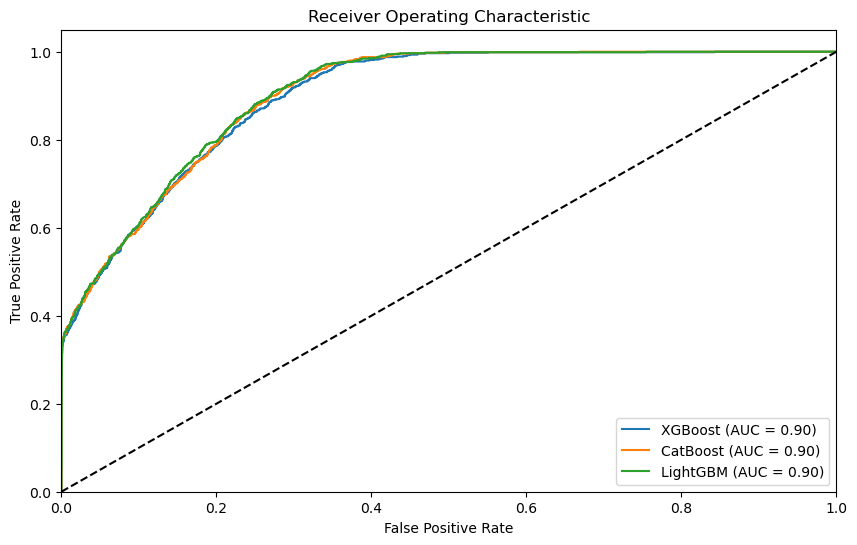

In [46]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(cat_fpr, cat_tpr, label=f'CatBoost (AUC = {cat_auc:.2f})')
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()